# <span style="color:lightgreen;"> **EDA danych historycznych JustJoinIT**

In [169]:
# import niezbędnych bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 62)
pd.set_option('display.max_colwidth', None) 

## <span style="color:lightgreen;"> 1. Ogólny przegląd danych

In [170]:
# Pobieramy dane z pliku CSV
df = pd.read_csv(
    "https://jurek.fra1.digitaloceanspaces.com/masterclass/all_old_data.csv.gz",
    sep=";",
    encoding="utf-8",
    compression="gzip",
    low_memory=False  # Warto dodać w celu uniknięcia DtypeWarning
)

# Konwersja kolumn na typ daty
df['published_at_first'] = pd.to_datetime(df['published_at_first'], errors='coerce')
df['published_at_last'] = pd.to_datetime(df['published_at_last'], errors='coerce')

### <span style='color: lightgreen'>1.1 10 losowych wierszy

In [171]:
# 10 losowych wierszy
df.sample(10)

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,remote_interview,id,skills,remote,type,salary_from,salary_to,salary_currency,published_at_first,published_at_last,open_to_hire_ukrainians
36072,Młodszy Specjalista ds. IT,Warszawa,PL,support,office,IMPULS-LEASING,51-200,junior,True,impuls-leasing-mlodszy-specjalista-ds-it,"Windows, Helpdesk",False,mandate_contract,NaN,NaN,NaN,2022-03-31 11:01:00+00:00,2022-04-28 11:00:24.475000+00:00,False
35589,Node.js Developer,Zielona Góra,PL,javascript,remote,Solidstudio,27,mid,True,solidstudio-node-js-developer-zielona-gora,"TypeScript, JavaScript, Node.js",True,b2b,16800.0,23520.0,pln,2022-03-30 11:13:00+00:00,2022-04-24 11:00:19.180000+00:00,True
211973,IT Project Manager with German,Wrocław,PL,pm,remote,NATEK,600,senior,False,natek-it-project-manager-with-german-b3c16172-791b-49f7-b2ed-c2b725937029,"English, Project Management, German",True,b2b,28000.0,28000.0,pln,2023-08-02 13:44:00+00:00,2023-08-26 14:00:10.540000+00:00,False
160929,QA Engineer,Warszawa,PL,testing,partly_remote,Medpace,5000+,mid,True,medpace-qa-engineer-1140e70a-ceff-4c3b-9d22-34439fe1525b,"SQL, Test Automation, Testing",False,permanent,14000.0,20000.0,pln,2023-03-08 08:22:00+00:00,2023-04-09 09:00:12.861000+00:00,True
120347,C++ Developer,Sofia,BG,c,remote,Dynamic Technology Lab,50+,senior,True,dynamic-technology-lab-c-developer-sofia,"Linux, C++20, C++",True,permanent,3000.0,6000.0,usd,2022-11-15 08:52:00+00:00,2022-12-10 09:00:17.120000+00:00,True
102064,Senior Infrastructure Engineer,Warszawa,PL,devops,remote,ClickUp,800+,senior,False,clickup-senior-infrastructure-engineer,"CDK, SRE, Amazon Web Services",True,b2b,4500.0,9000.0,usd,2022-09-29 18:26:00+00:00,2023-02-01 08:00:12.806000+00:00,False
162225,Outsystems Developer,Kraków,PL,other,remote,C&F S.A.,430+,mid,True,c-f-s-a-outsystems-developer-krakow,"WebService, Agile, OutSystems",True,b2b,NaN,NaN,NaN,2023-03-13 15:27:00+00:00,2023-04-06 16:00:10.763000+00:00,False
141821,Software Engineer,Lublin,PL,python,remote,CloudFerro sp. z o.o.,180,mid,True,cloudferro-sp-z-o-o-software-engineer-lublin,"Git, SQL, Python 3.x",True,permanent,11000.0,18000.0,pln,2023-01-20 09:32:00+00:00,2023-02-14 10:00:11.763000+00:00,True
201390,Senior Database Reliability Engineer,Białystok,PL,data,remote,ClickUp,800+,senior,True,clickup-senior-database-reliability-engineer-bialystok,"Ansible, Chef, PostgreSQL",True,b2b,20000.0,40000.0,pln,2023-06-29 06:37:00+00:00,2023-07-27 07:00:22.574000+00:00,False
196983,Data Integration Manager,Wrocław,PL,data,remote,Competera,70+,mid,True,competera-data-integration-manager-wroclaw,"Python, SQL, English",True,b2b,2000.0,3000.0,usd,2023-06-16 13:56:00+00:00,2023-07-04 14:00:12.270000+00:00,True


In [172]:
%%capture
# ogólne informacje o danych
df.info()

### <span style='color: lightgreen'>1.2 Przedział czasowy publikacji ofert

In [173]:
df['published_at_first'] = pd.to_datetime(df['published_at_first'], errors='coerce').dt.date
df['published_at_last'] = pd.to_datetime(df['published_at_last'], errors='coerce').dt.date

# Uzyskiwanie minimum i maksimum
min_max_info = df[['published_at_first', 'published_at_last']].agg(['min', 'max'])
#print(min_max_info)
type(min_max_info)
min_max_info.style

,published_at_first,published_at_last
min,2021-09-20,2021-09-20
max,2023-09-25,2023-09-25


<span style='color: violet'> Komentarze i wnioski wstępne:
<li style='color: violet'>Dane dotyczą lat 2021-2023 i zawierają aż 229891 wierszy oraz 19 kolumn.
<li style='color: violet'>W 15 kolumnach znajdują się wartości tekstowe, w 2 wartości logiczne i w 2 wartości liczbowe.
<li style='color: violet'>Problematyczny wydaje się brak informacji czy podane wynagrodzenie to stawka godzinowa, tygodniowa, miesięczna czy może roczna oraz brak informacji odnośnie wymiaru czasu pracy.


## <span style='color: lightgreen'>2. Brakujące wartości

In [174]:
# Sprawdzenie brakujących wartości
isnull_info = df.isnull().sum().sort_values(ascending=False)

# Liczba wierszy w DataFrame
total_rows = len(df)

# Obliczenie procentu brakujących wartości
missing_percentage = (isnull_info / total_rows) * 100

# Konwersja obliczeń do DataFrame i filtrowanie tylko kolumn z brakującymi wartościami
isnull_df = pd.DataFrame({
    'Liczba brakujących wartości': isnull_info[isnull_info > 0],
    'Udział procentowy': (missing_percentage[missing_percentage > 0].round(2)).astype(str) + '%'  # Zaokrąglenie i dodanie znaku %
})

# Wyświetlenie podsumowania brakujących wartości
isnull_df.style

,Liczba brakujących wartości,Udział procentowy
salary_currency,71141,30.95%
salary_to,71141,30.95%
salary_from,71141,30.95%
open_to_hire_ukrainians,28115,12.23%
country_code,98,0.04%
skills,4,0.0%


<span style='color: violet'> Komentarz:
<li style='color: violet'>Brakujące wartości występują w 6 kolumnach - najwięcej jest braków związanych z wynagrodzeniem - ok. 31%.

## <span style='color: lightgreen'>3. Transformacja danych

In [175]:
%%capture
# usunięcie kolumny 'remote'
df = df.drop(columns=['remote'])

# zmiana kolejności kolumn
new_order = ['title', 'city', 'country_code', 'workplace_type',
       'company_name', 'company_size', 'experience_level', 
        'type', 'salary_from', 'salary_to','salary_currency', 
        'id', 'published_at_first', 'published_at_last', 'marker_icon', 
        'remote_interview', 'skills', 'open_to_hire_ukrainians']
df = df[new_order]

<span style='color: violet'> Korekty wstępne:
<li style='color: violet'>Usunięto kolumnę 'remote', ponieważ informację o miejscu pracy możemy odczytać z kolumny 'workplace_type'.
<li style='color: violet'>Zmieniono kolejność kolumn w celu poprawy czytelności danych.

In [176]:
df.sample(5)

,title,city,country_code,workplace_type,company_name,company_size,experience_level,type,salary_from,salary_to,salary_currency,id,published_at_first,published_at_last,marker_icon,remote_interview,skills,open_to_hire_ukrainians
14327,Senior PHP Developer,Wrocław,PL,remote,CKSource,65+,senior,b2b,16000.0,21000.0,pln,cksource-senior-php-developer-wroclaw,2021-12-07,2022-01-01,php,True,"JavaScript, Symfony, PHP",NaN
154444,OPT Automation Test Lead Engineer,Rybnik,PL,remote,CXC Global Poland SP z.o.o,15,mid,b2b,33200.0,35200.0,pln,cxc-global-poland-sp-z-o-o-opt-automation-test-lead-engineer-rybnik,2023-02-22,2023-03-19,testing,True,"NUnit, Appium, Windows Testing",False
197634,Senior Java Fullstack Developer,Gdańsk,PL,remote,NATEK,600,senior,b2b,25600.0,27000.0,pln,natek-senior-java-fullstack-developer-gdansk,2023-06-19,2023-07-13,java,False,"Postgres, Angular, Java",False
50859,PHP Developer,Białystok,PL,partly_remote,Sempai,+100,junior,b2b,4500.0,8000.0,pln,sempai-php-developer-c4fabd99-e627-4c42-a97a-062ff128fb99,2022-05-24,2023-09-01,php,False,"MySQL, OOP, PHP",True
182281,Software Developer Cloud (f/m/x),Wrocław,PL,partly_remote,TPG The Project Group,>60,senior,permanent,4500.0,5500.0,eur,tpg-the-project-group-software-developer-cloud-f-m-x-d45c3a93-8194-4bb0-97d4-b64529f3f14f,2023-05-08,2023-06-02,devops,True,"MS Azure, Kubernetes, Relay",True


### <span style='color: lightgreen'>3.1 Miasta

In [177]:
%%capture
# Wyświetlenie wartości i ich liczebności
city_counts = df['city'].value_counts().head(20)

# Konwersja do DataFrame
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ['Miasto', 'Liczba wierszy']  # Ustawienie nazw kolumn

# Wyświetlenie stylizowanej tabeli bez indeksu
city_counts_df.style.set_table_attributes('style="width: 30%;"').hide_index()

In [178]:
# Ustawienie wszystkich wartości w kolumnie 'city', aby zaczynały się wielką literą
df['city'] = df['city'].str.capitalize()

# Nazwy miast w języku angielskim
incorrect_city_names = ['Warsaw', 'Cracow', 'Krakow', 'Wroclaw', 'Gdansk', 
                        'Poznan', 'Bielsko-biala', 'Łodź', 'Rzeszow', 
                        'Bialystok', 'Torun', 'Zielona gora']

# Zbieranie wyników do DataFrame
results = []

# Pętla iterująca po nazwach miast
for city in incorrect_city_names:
    count = (df['city'] == city).sum()  # Zlicza wystąpienia miasta
    results.append((city, count))  # Dodaje do listy wyników jako krotki

# Konwersja wyników do DataFrame
results_df = pd.DataFrame(results, columns=['Niepoprawna nazwa miasta', 'Liczba wierszy'])

# Wyświetlenie wyników w stylizowanej tabeli
results_df.style.set_table_attributes('style="width: 50%;"')\
                .hide(axis='index')  # Ukrycie kolumny indeksu (poprawiona linia)
 

Niepoprawna nazwa miasta,Liczba wierszy
Warsaw,689
Cracow,0
Krakow,0
Wroclaw,0
Gdansk,1
Poznan,1
Bielsko-biala,19
Łodź,1
Rzeszow,26
Bialystok,0


In [179]:
# ujednolicamy nazwy miast
city_mapping = {
    'Warsaw': 'Warszawa',
    'Gdansk': 'Gdańsk',
    'Poznan': 'Poznań',
    'Łodź': 'Łódź',
    'Rzeszow': 'Rzeszów',
    'Torun': 'Toruń',
    'Zielona gora': 'Zielona góra',
    'Bielsko-biala': 'Bielsko-biała'
}

df['city'] = df['city'].replace(city_mapping)

<span style='color: violet'> Komentarz:
<li style='color: violet'>Nazwy miast zostały ujednolicone, tzn. w danych nie występują już 2 lub więcej takich samych miast różnie zapisanych, np. z dużej i małej litery lub po polsku i angielsku.

### <span style='color: lightgreen'>3.2 Kod kraju

In [180]:
# Grupowanie po miastach z brakującym kodem kraju
missing_country_codes = df[df['country_code'].isna()].groupby('city').size()

# Przekształcanie wyniku w DataFrame
missing_country_codes_df = missing_country_codes.reset_index(name='Liczba_wierszy')

# Zmiana nazw kolumn
missing_country_codes_df.rename(columns={'city': 'Miasto', 'Liczba_wierszy': 'Liczba wierszy z brakującym kodem kraju'}, inplace=True)

# Stylizacja tabeli
styled_table = missing_country_codes_df.style.set_table_attributes('style="width: 50%;"') \
     .format(precision=0) \
     .hide(axis='index') \
     .format({'Liczba wierszy': '{:.0f}'})  # Formatowanie kolumny liczbowej

# Wyświetlenie ostylowanej tabeli
styled_table

Miasto,Liczba wierszy z brakującym kodem kraju
Amsterdam,1
Barcelona,1
Berlin,1
Bukareszt,1
Błonie,1
Dniepr,1
Europe,3
European union,4
Gdańsk,2
Gorzów wielkopolski,1


<span style='color: violet'> Komentarz:
<li style='color: violet'>Uzupełniono brakujące kody krajów na podstawie podanych miast.

In [181]:
# Słownik z mapowaniem miast na kody krajów
country_codes_mapping = {
    'Warszawa': 'PL', 'Wrocław': 'PL', 'Kraków': 'PL', 'Poznań': 'PL',
    'Szczecin': 'PL', 'Katowice': 'PL', 'Łódź': 'PL', 'Gdańsk': 'PL',
    'Gorzów wielkopolski': 'PL', 'Błonie': 'PL', 'Lublin': 'PL',
    'Zielona góra': 'PL',
    'Prisztina': 'XK',  # Kosowo
    'London': 'GB',      # Anglia
    'Barcelona': 'ES',   # Hiszpania
    'Madryt': 'ES',      # Hiszpania
    'Amsterdam': 'NL',   # Holandia
    'Berlin': 'DE',      # Niemcy
    'Munich': 'DE',      # Niemcy
    'Bukareszt': 'RO',   # Rumunia
    'Dniepr': 'UA',      # Ukraina
    'Lwów': 'UA',        # Ukraina
    'Limassol': 'CY',    # Cypr
    'Lizbon': 'PT',      # Portugalia
    'Zurych': 'CH',      # Szwajcaria
    'Windhuk': 'NA',     # Namibia
    'European union': 'otherEurope', 
    'Europe': 'otherEurope'
}

# Nadpisywanie wartości 'NaN' kodem kraju w kolumnie 'country_code'
df.loc[df['country_code'].isna(), 'country_code'] = df['city'].replace(country_codes_mapping)
df.sample(5)

,title,city,country_code,workplace_type,company_name,company_size,experience_level,type,salary_from,salary_to,salary_currency,id,published_at_first,published_at_last,marker_icon,remote_interview,skills,open_to_hire_ukrainians
104169,Senior Web Developer,Lublin,PL,remote,Netguru,800+,senior,b2b,16000.0,25000.0,pln,netguru-senior-web-developer-lublin,2022-10-05,2022-10-30,javascript,True,"CMS, SCSS, JS",True
153465,Senior FullStack Angular/Typescript/Node,Katowice,PL,remote,KitRUM,51-200,senior,b2b,4600.0,5600.0,usd,kitrum-senior-fullstack-angular-typescript-node-katowice,2023-02-20,2023-03-06,javascript,False,"TypeScript, React, Angular",True
63267,Programista PHP,Warszawa,PL,office,Asterisk-Dev,<20,junior,b2b,4500.0,9000.0,pln,asterisk-dev-programista-php,2022-06-30,2022-07-20,php,True,"MySQL, jQuery, PHP 7",False
201768,Data Governance Senior Software Engineer,Katowice,PL,remote,Randstad Polska Sp. z o.o.,500,senior,permanent,NaN,NaN,NaN,randstad-polska-sp-z-o-o-data-governance-senior-software-engineer-katowice,2023-06-30,2023-07-20,data,True,"Cloud, Data, CI/CD",False
169395,Lead Software Engineer,Reda,PL,partly_remote,LSEG,5000,senior,permanent,NaN,NaN,NaN,lseg-lead-software-engineer-reda,2023-03-31,2023-06-12,pm,False,"Software Development, Programming",False


### <span style='color: lightgreen'>3.3 Nazwa firmy

In [182]:
# Liczba unikatowych firm przed i po ujednoliceniu
beginning_unique = df['company_name'].nunique()
df_upper = df['company_name'].str[0].str.upper() + df['company_name'].str[1:]
finally_unique = df_upper.nunique()

# Estetyczne wyświetlenie komunikatów
print("=" * 50)
print(f"{'Opis':<40} {'Liczba unikatowych firm':<10}")
print("=" * 50)
print(f"{'Bez zmian czcionki':<40} {beginning_unique:<10}")
print(f"{'Po ujednoliceniu czcionki':<40} {finally_unique:<10}")
print("=" * 50)

Opis                                     Liczba unikatowych firm
Bez zmian czcionki                       7598      
Po ujednoliceniu czcionki                7576      


<span style='color: violet'> Komentarz:
<li style='color: violet'>W nazwach firm występowały ukryte duplikaty - w jednym ogłoszeniu nazwa firmy była pisana z dużej litery, a w innym z małej. W dalszej analizie będą używane nazwy firm pisane z dużej litery. 

In [183]:
# Tworzenie nowej serii z dużą pierwszą literą
df['company_name'] = df['company_name'].str[0].str.upper() + df['company_name'].str[1:]

### <span style='color: lightgreen'>3.4 Wynagrodzenie

#### <span style='color: lightgreen'>3.4.1 Zmiana waluty na pln

In [184]:
# Sprawdzenie częstości występowania walut
currency_counts = df['salary_currency'].value_counts()

# Zbieranie danych do DataFrame
currency_df = currency_counts.reset_index()
currency_df.columns = ['Waluta', 'Liczba wystąpień']  # Ustawienie nazw kolumn

# Obliczenie udziału procentowego
currency_df['Udział procentowy'] = ((currency_df['Liczba wystąpień'] / currency_df['Liczba wystąpień'].sum()) * 100).round(2).astype(str) + '%'

# Filtrowanie walut innych niż PLN
currency_df = currency_df[currency_df['Waluta'] != 'PLN']

# Wyświetlenie wyników w stylizowanej tabeli
styled_table = currency_df.style.set_table_attributes('style="width: 50%;"')\
                                 .hide(axis='index')  # Zmieniona metoda

# Wyświetlenie tabeli
styled_table

Waluta,Liczba wystąpień,Udział procentowy
pln,144307,90.9%
eur,7659,4.82%
usd,5957,3.75%
gbp,730,0.46%
chf,97,0.06%


In [185]:
# kursy dolara, euro, funta i franka szwajcarskiego na dzień 08.06.2025
usd_to_pln = 3.76
eur_to_pln = 4.29
gbp_to_pln = 5.05
chf_to_pln = 4.56


# Konwersja wartości w kolumnach salary_from i salary_to na PLN
df['salary_from'] = df.apply(
    lambda x: (x['salary_from'] * usd_to_pln if x['salary_currency'] == 'usd' else 
                x['salary_from'] * eur_to_pln if x['salary_currency'] == 'eur' else 
                x['salary_from']) if x['salary_from'] is not None else None,
    axis=1
)

df['salary_to'] = df.apply(
    lambda x: (x['salary_to'] * usd_to_pln if x['salary_currency'] == 'usd' else 
                x['salary_to'] * eur_to_pln if x['salary_currency'] == 'eur' else 
                x['salary_to']) if x['salary_to'] is not None else None,
    axis=1
)

# Zamiana symboli walut obcych na pln
df['salary_currency'] = np.where(df['salary_currency'].isin(['eur', 'usd', 'gbp', 'chf']), 'pln', df['salary_currency'])

<span style='color: violet'> Komentarze:
<li style='color: violet'>Typy walut obcych wymienione powyżej zostały zamienione na złotówki i przeliczone zgodnie z bieżącym kursem.
<li style='color: violet'>Typy walut o wartości NaN na razie nie zostały zmienione - nastąpi to przy uzupełnianiu brakujących wartości dotyczących wartości wynagrodzenia.

#### <span style='color: lightgreen'>3.4.2 Klasyfikacja wynagrodzeń

In [186]:
%%capture
# obserwacja wynagrodzeń dla różnych poziomów doświadczenia
df_junior = df[df['experience_level'] == 'junior']
df_mid = df[df['experience_level'] == 'mid']
df_senior = df[df['experience_level'] == 'senior']
#df_junior[df_junior['salary_from'] > 20000]
#df_mid[df_mid['salary_from'] < 1000]
#df_mid['salary_from'].describe()
#df_junior['salary_from'].value_counts()
#df_mid['salary_from'].value_counts().sort_index().head(20)
#df_senior[(df_senior['salary_from'] >= 70000) & (df_senior['salary_from'] < 80000)]
#df_senior[df_senior['salary_from'] > 60000]
df[(df['salary_from'] < 5500) & (df['experience_level'] != 'junior')]

In [187]:
def convert_salary(row):
    if row['experience_level'] == 'junior':
        if row['salary_from'] > 40000: #rocznie
            return pd.Series({
                'salary_from': row['salary_from'] / 12,
                'salary_to': row['salary_to'] / 12
            })
        else:
            return pd.Series({
                'salary_from': row['salary_from'],
                'salary_to': row['salary_to']
            })

    elif row['experience_level'] == 'mid':
        if row['salary_from'] <= 1200:  # dniówka
            return pd.Series({
                'salary_from': row['salary_from'] * 21,
                'salary_to': row['salary_to'] * 21
            })
        elif 1200 < row['salary_from'] <= 5500:  # tygodniówka
            return pd.Series({
                'salary_from': row['salary_from'] * 4,
                'salary_to': row['salary_to'] * 4
            })
        elif 5500 < row['salary_from'] <= 60000:  # miesięcznie
            return pd.Series({
                'salary_from': row['salary_from'],
                'salary_to': row['salary_to']
            })
        else:  # rocznie
            return pd.Series({
                'salary_from': row['salary_from'] / 12,
                'salary_to': row['salary_to'] / 12
            })

    elif row['experience_level'] == 'senior':
        if row['salary_from'] <= 1700:  # dniówka
            return pd.Series({
                'salary_from': row['salary_from'] * 21,
                'salary_to': row['salary_to'] * 21
            })
        elif 1700 < row['salary_from'] <= 7700:  # tygodniówka
            return pd.Series({
                'salary_from': row['salary_from'] * 4,
                'salary_to': row['salary_to'] * 4
            })
        elif 7700 < row['salary_from'] <= 90000:  # miesięcznie
            return pd.Series({
                'salary_from': row['salary_from'],
                'salary_to': row['salary_to']
            })
        else:  # rocznie
            return pd.Series({
                'salary_from': row['salary_from'] / 12,
                'salary_to': row['salary_to'] / 12
            })

# Zastosowanie funkcji do DataFrame
df[['salary_from', 'salary_to']] = df.apply(convert_salary, axis=1)

<span style='color: violet'> Komentarze:
<li style='color: violet'>Ujednolicono wszystkie wartości wynagrodzenia (kolumny 'salary_from' i 'salary_to') do stawek miesięcznych w celu łatwiejszego porównania.
<li style='color: violet'>Na potrzeby powyższego ujednolicenia, przyjęto różne przedziały wynagrodzeń dziennych, tygodniowych, miesięcznych i godzinowych w zależności od poziomu doświadczenia pracownika.

## <span style='color: lightgreen'>4. Duplikaty

In [188]:
%%capture
# wyświetlamy listę wszystkich kolumn
df.columns

In [189]:
from prettytable import PrettyTable

# lista kolumn z wyjątkiem 'id'
duplicate_columns = [col for col in df.columns if col != 'id']

# Obliczamy liczbę zduplikowanych wierszy
df_clean = df.drop_duplicates(subset=duplicate_columns)

# Tworzymy tabelę i dodajemy dane
table = PrettyTable()
table.field_names = ["Opis", "Liczba wierszy"]
table.add_row(["Początkowo", len(df)])
table.add_row(["Po usunięciu duplikatów", len(df_clean)])

# Wyświetlamy tabelę
print(table)

+-------------------------+----------------+
|           Opis          | Liczba wierszy |
+-------------------------+----------------+
|        Początkowo       |     229891     |
| Po usunięciu duplikatów |     228502     |
+-------------------------+----------------+


<span style='color: violet'> Komentarz:
<li style='color: violet'>Dane zawierały 542 zduplikowane wiersze, które zostały usunięte i liczba pozostałych unikatowych wierszy to 228502.

## <span style='color: lightgreen'>5. Analiza pojedynczych kolumn i zależności między nimi

### <span style='color: lightgreen'>5.1 Miasta

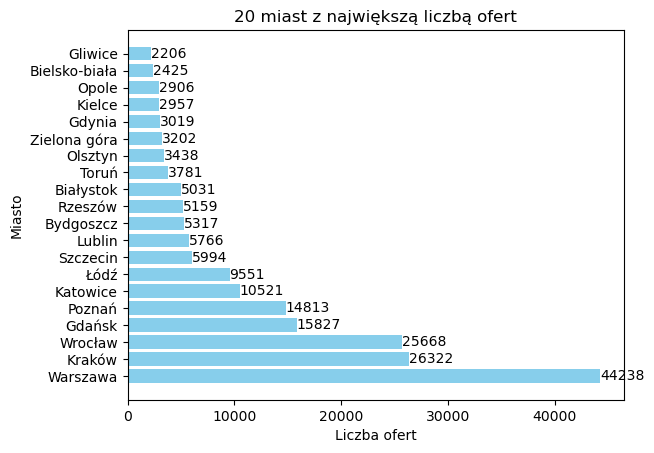

In [190]:
# Zliczenie wartości w kolumnie city
city_counts = df_clean['city'].value_counts().head(20)

# Narysowanie wykresu słupkowego poziomego
plt.barh(city_counts.index, city_counts.values, color='skyblue')
plt.xlabel('Liczba ofert')
plt.ylabel('Miasto')
plt.title('20 miast z największą liczbą ofert')

# Dodanie liczb ofert na każdym słupku
for index, value in enumerate(city_counts.values):
    plt.text(value, index, str(value), va='center')  # va='center' zapewnia wyrównanie w pionie

plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Najwięcej, czyli ok 19% ofert, pochodzi z firm warszawskich. Dużo miejsc pracy można znaleźć również w Krakowie i Wrocławiu.

### <span style='color: lightgreen'>5.2 Kraje

In [191]:
%%capture
df['country_code'].value_counts()

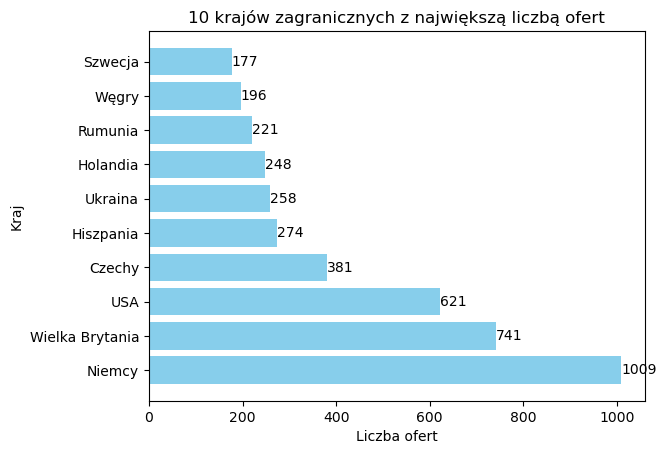

In [192]:
# Zliczenie wartości w kolumnie country_code
country_counts = df_clean['country_code'].value_counts().iloc[1:11]

# Zmiana nazw na osi Y (na przykład)
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 'Hiszpania', 
              'Ukraina', 'Holandia', 'Rumunia', 'Węgry', 'Szwecja']

# Narysowanie wykresu słupkowego poziomego
plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel('Liczba ofert')
plt.ylabel('Kraj')
plt.title('10 krajów zagranicznych z największą liczbą ofert')

# Dodanie liczb ofert na każdym słupku
for index, value in enumerate(country_counts.values):
    plt.text(value, index, str(value), va='center')  # va='center' zapewnia wyrównanie w pionie

# Ustawianie nowych etykiet na osi Y
plt.yticks(ticks=range(len(popular_countries)), labels=popular_countries)

plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>Aż ok. 97,5% wszystkich ofert pochodzi z polskich firm.
<li style='color: violet'>Oferty zagraniczne to najczęściej Niemcy, Wielka Brytania i USA.

### <span style='color: lightgreen'>5.3 Miejsce pracy

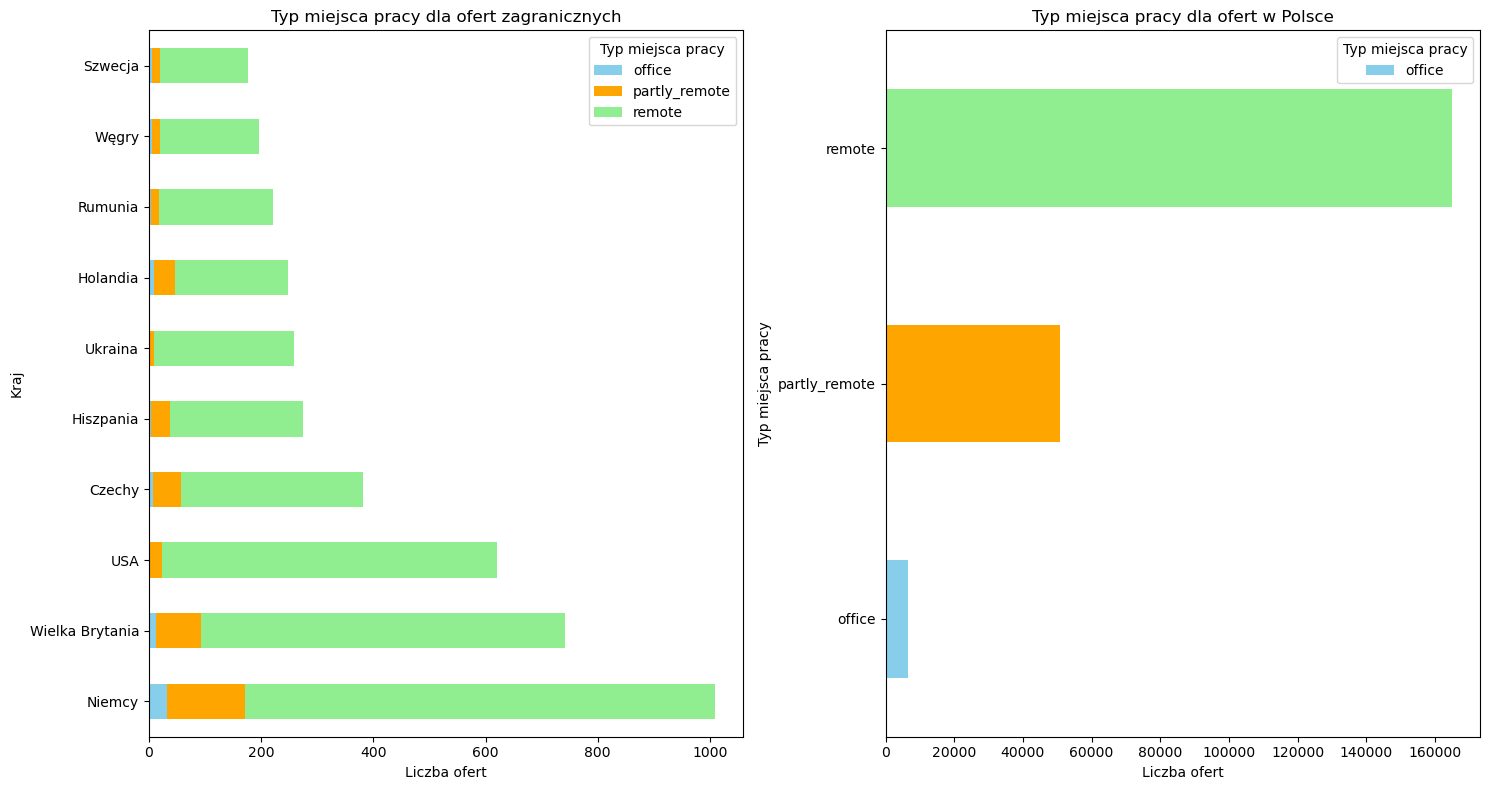

In [193]:
# Zliczanie wartości w kolumnie country_code i pomijanie Polski
country_counts = df_clean['country_code'].value_counts()
country_counts_without_poland = country_counts[country_counts.index != 'Polska']

# Wybieranie krajów z indeksem 1-10
top_countries = country_counts_without_poland.iloc[1:11].index

# Grupa po 'country_code' i 'workplace_type' oraz zliczanie
country_workplace_counts = df_clean.groupby(['country_code', 'workplace_type']).size().unstack(fill_value=0)

# Filtrowanie dla wybranych krajów
country_workplace_counts = country_workplace_counts.loc[top_countries]

# Zmiana etykiet krajów na pełne nazwy w tablicy 'popular_countries'
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 
                     'Hiszpania', 'Ukraina', 'Holandia', 'Rumunia', 
                     'Węgry', 'Szwecja']

# Tworzenie osobnych wykresów
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Wykres dla krajów z indeksem 1-10
country_workplace_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange', 'lightgreen'], ax=axes[0])
axes[0].set_yticklabels(popular_countries)
axes[0].set_xlabel('Liczba ofert')
axes[0].set_ylabel('Kraj')
axes[0].set_title('Typ miejsca pracy dla ofert zagranicznych')
axes[0].legend(title='Typ miejsca pracy')

# Wykres dla ofert z Polski
poland_workplace_counts = df_clean[df_clean['country_code'] == 'PL'].groupby('workplace_type').size()

# Narysowanie wykresu
poland_workplace_counts.plot(kind='barh', color=['skyblue', 'orange', 'lightgreen'], ax=axes[1])

# Ustawienia wykresu
axes[1].set_xlabel('Liczba ofert')
axes[1].set_ylabel('Typ miejsca pracy')
axes[1].set_title('Typ miejsca pracy dla ofert w Polsce')

# Dodanie legendy z ręcznie przypisanymi etykietami
axes[1].legend(title='Typ miejsca pracy', labels=poland_workplace_counts.index)

plt.tight_layout()
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>Niezależnie od kraju, ofert pracy zdalnej jest zdecydowanie najwięcej, a ofert pracy wyłącznie stacjonarnej najmniej.
<li style='color: violet'>W przypadku pracy hybrydowej lub stacjonarnej w krajach zagranicznych nie mamy niestety informacji odnośnie opcji zakwaterowania.

### <span style='color: lightgreen'>5.4 Nazwa firmy

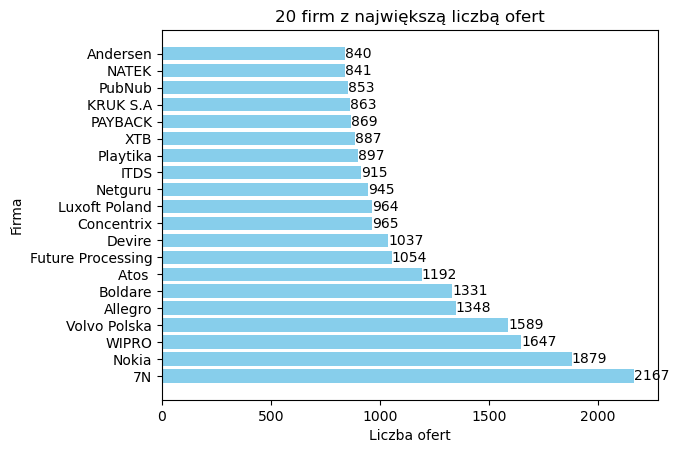

In [194]:
# Zliczenie wartości w kolumnie country_code
company_counts = df_clean['company_name'].value_counts().iloc[0:20]

# Narysowanie wykresu słupkowego poziomego
plt.barh(company_counts.index, company_counts.values, color='skyblue')
plt.xlabel('Liczba ofert')
plt.ylabel('Firma')
plt.title('20 firm z największą liczbą ofert')

# Dodanie liczb ofert na każdym słupku
for index, value in enumerate(company_counts.values):
    plt.text(value, index, str(value), va='center')  # va='center' zapewnia wyrównanie w pionie

plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Firmy z największą liczbą ofert to 7N, Nokia i WIPRO.

### <span style='color: lightgreen'>5.5 Poziom doświadczenia

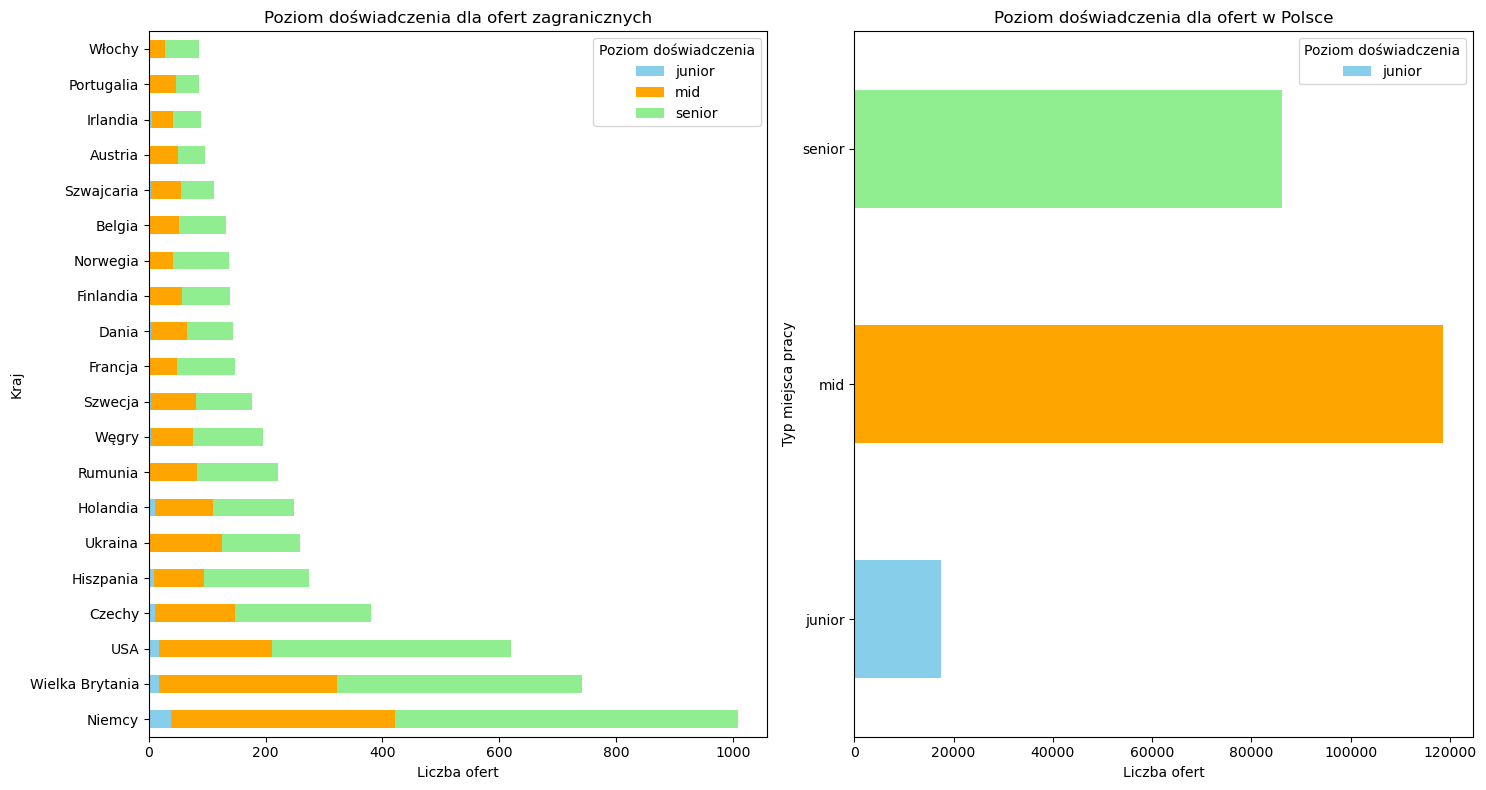

In [195]:
# Zliczanie wartości w kolumnie country_code i pomijanie Polski
country_counts = df_clean['country_code'].value_counts()
country_counts_without_poland = country_counts[country_counts.index != 'Polska']

# Wybieranie krajów z indeksem 1-10
top_countries = country_counts_without_poland.iloc[1:21].index

# Grupa po 'country_code' i 'experience_level' oraz zliczanie
country_workplace_counts = df_clean.groupby(['country_code', 'experience_level']).size().unstack(fill_value=0)

# Filtrowanie dla wybranych krajów
country_workplace_counts = country_workplace_counts.loc[top_countries]

# Zmiana etykiet krajów na pełne nazwy w tablicy 'popular_countries'
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 
                     'Hiszpania', 'Ukraina', 'Holandia', 'Rumunia', 
                     'Węgry', 'Szwecja', 'Francja','Dania','Finlandia',
                     'Norwegia','Belgia','Szwajcaria','Austria','Irlandia',
                     'Portugalia','Włochy']

# Tworzenie osobnych wykresów
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Wykres dla krajów z indeksem 1-10
country_workplace_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange', 'lightgreen'], ax=axes[0])
axes[0].set_yticklabels(popular_countries)
axes[0].set_xlabel('Liczba ofert')
axes[0].set_ylabel('Kraj')
axes[0].set_title('Poziom doświadczenia dla ofert zagranicznych')
axes[0].legend(title='Poziom doświadczenia')

# Wykres dla ofert z Polski
poland_workplace_counts = df_clean[df_clean['country_code'] == 'PL'].groupby('experience_level').size()

# Narysowanie wykresu
poland_workplace_counts.plot(kind='barh', color=['skyblue', 'orange', 'lightgreen'], ax=axes[1])
axes[1].set_xlabel('Liczba ofert')
axes[1].set_ylabel('Typ miejsca pracy')
axes[1].set_title('Poziom doświadczenia dla ofert w Polsce')

# Dodanie legendy na podstawie dostępnych etykiet
axes[1].legend(title='Poziom doświadczenia', labels=poland_workplace_counts.index)

plt.tight_layout()
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>W Polsce, Austrii i Szwajcarii najczęściej poszukiwani są specjaliści na poziomie doświadczenia mid.
<li style='color: violet'>W pozostałych 18 krajach z największą liczbą ofert najczęściej poszukiwani są seniorzy.

### <span style='color: lightgreen'>5.6 Typ umowy

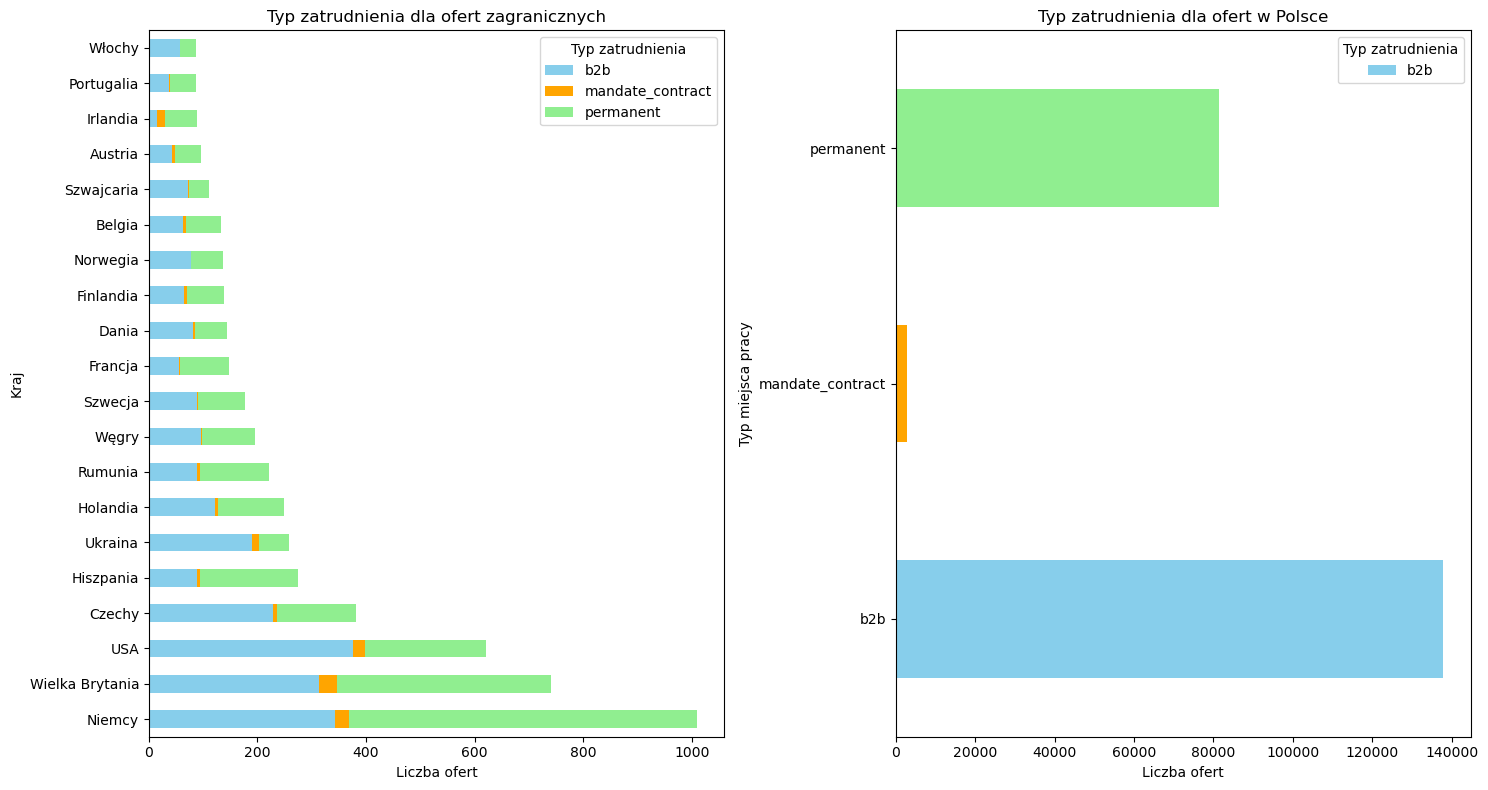

In [196]:
# Zliczanie wartości w kolumnie country_code i pomijanie Polski
country_counts = df_clean['country_code'].value_counts()
country_counts_without_poland = country_counts[country_counts.index != 'Polska']

# Wybieranie krajów z indeksem 1-10
top_countries = country_counts_without_poland.iloc[1:21].index

# Grupa po 'country_code' i 'type' oraz zliczanie
country_workplace_counts = df_clean.groupby(['country_code', 'type']).size().unstack(fill_value=0)

# Filtrowanie dla wybranych krajów
country_workplace_counts = country_workplace_counts.loc[top_countries]

# Zmiana etykiet krajów na pełne nazwy w tablicy 'popular_countries'
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 
                     'Hiszpania', 'Ukraina', 'Holandia', 'Rumunia', 
                     'Węgry', 'Szwecja', 'Francja','Dania','Finlandia',
                     'Norwegia','Belgia','Szwajcaria','Austria','Irlandia',
                     'Portugalia','Włochy']

# Tworzenie osobnych wykresów
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Wykres dla krajów z indeksem 1-10
country_workplace_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange', 'lightgreen'], ax=axes[0])
axes[0].set_yticklabels(popular_countries)
axes[0].set_xlabel('Liczba ofert')
axes[0].set_ylabel('Kraj')
axes[0].set_title('Typ zatrudnienia dla ofert zagranicznych')
axes[0].legend(title='Typ zatrudnienia')

# Wykres dla ofert z Polski
poland_workplace_counts = df_clean[df_clean['country_code'] == 'PL'].groupby('type').size()
poland_workplace_counts.plot(kind='barh', color=['skyblue', 'orange', 'lightgreen'], ax=axes[1])

# Dodanie etykiet poziomów doświadczenia (np. 'typ zatrudnienia')
axes[1].set_xlabel('Liczba ofert')
axes[1].set_ylabel('Typ miejsca pracy')
axes[1].set_title('Typ zatrudnienia dla ofert w Polsce')

# Dodanie legendy z etykietami dla typów zatrudnienia
axes[1].legend(title='Typ zatrudnienia', labels=poland_workplace_counts.index)

plt.tight_layout()
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>W Polsce, Ukrainie, Szwajcariii i we Włoszech najwięcej ofert dotyczy zatrudnienia typu b2b.
<li style='color: violet'>W Niemczech, Hiszpanii czy Francji znaczna większość ofert dotyczy zatrudnienia na umowę o pracę.

### <span style='color: lightgreen'>5.7 Wymagane umiejętności

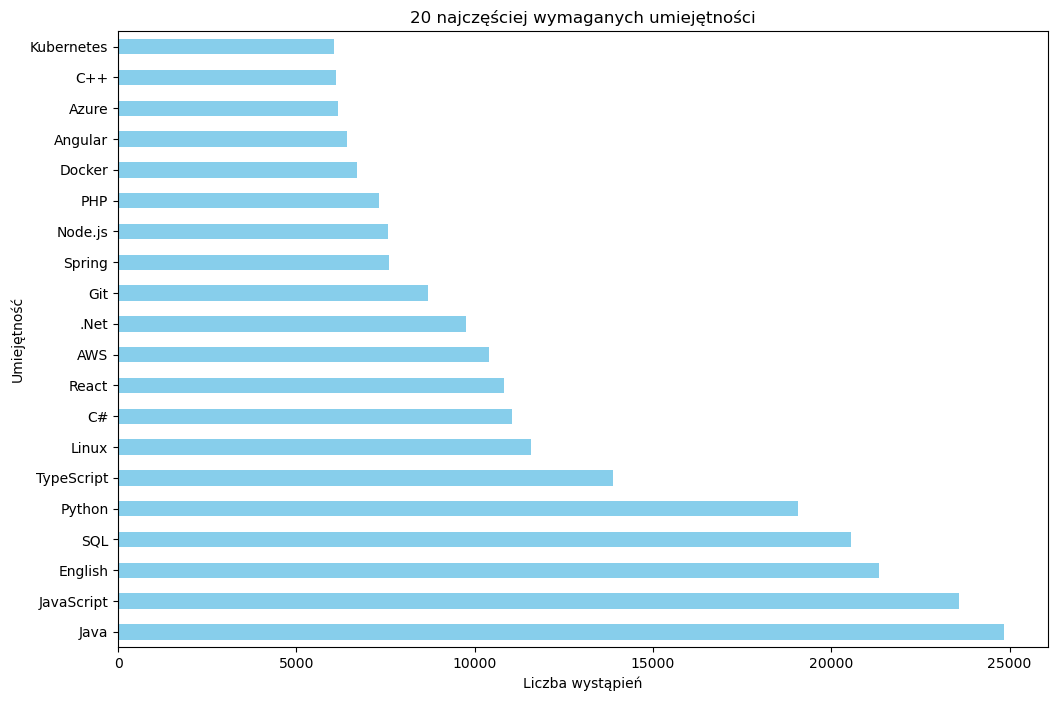

In [197]:
# Krok 1: Rozdzielenie umiejętności oddzielonych przecinkami
skills_series = df_clean['skills'].str.split(',').explode()  # Rozdzielenie i spłaszczenie
skills_series = skills_series.str.strip()  # Usunięcie białych znaków

# Krok 2: Zliczenie wystąpień umiejętności
skills_count = skills_series.value_counts()

# Krok 3: Wybór 20 najczęściej występujących umiejętności
top_skills = skills_count.nlargest(20)

# Krok 4: Narysowanie wykresu słupkowego
plt.figure(figsize=(12, 8))
top_skills.plot(kind='barh', color='skyblue')
plt.xlabel('Liczba wystąpień')
plt.ylabel('Umiejętność')
plt.title('20 najczęściej wymaganych umiejętności')
plt.show()

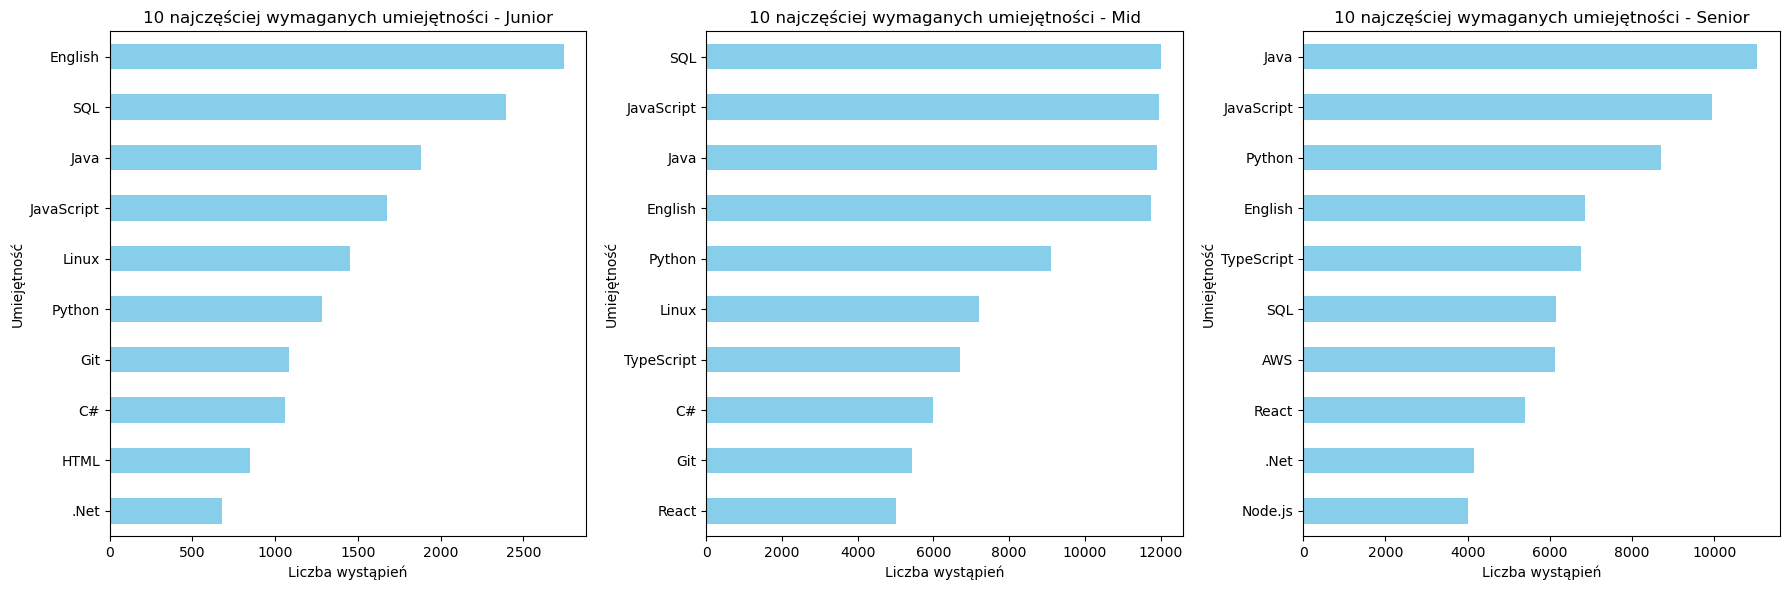

In [198]:
# Lista poziomów doświadczenia
experience_levels = ['junior', 'mid', 'senior']

# Przygotowanie figury i osi dla subplotów
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for ax, level in zip(axes, experience_levels):
    # Filtrowanie danych dla danego poziomu doświadczenia
    df_filtered = df_clean[df_clean['experience_level'] == level]

    # Krok 1: Rozdzielenie umiejętności
    skills_series = df_filtered['skills'].str.split(',').explode()
    skills_series = skills_series.str.strip()

    # Krok 2: Zliczenie wystąpień umiejętności
    skills_count = skills_series.value_counts()

    # Krok 3: Wybór 20 najczęściej występujących umiejętności
    top_skills = skills_count.nlargest(10)

    # Krok 4: Narysowanie wykresu słupkowego
    top_skills.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_xlabel('Liczba wystąpień')
    ax.set_ylabel('Umiejętność')
    ax.set_title(f'10 najczęściej wymaganych umiejętności - {level.capitalize()}')
    ax.invert_yaxis()  # Odwrócenie osi Y dla lepszej przejrzystości

plt.tight_layout()  # Ułożenie wykresów
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>Ogólnie najczęściej wymagane umiejętności obejmują języki programowania Java, JavaScript oraz znajomość języka angielskiego.
<li style='color: violet'>Od juniorów pracodawcy oczekują umiejętności głównie z zakresu j. angielskiego, SQL i Java, midowie powinni znać przede wszystkim SQL, JavaScript i Java, a seniorzy Java, JavaScript i Pythona.

### <span style='color: lightgreen'>5.8 Imigranci z Ukrainy

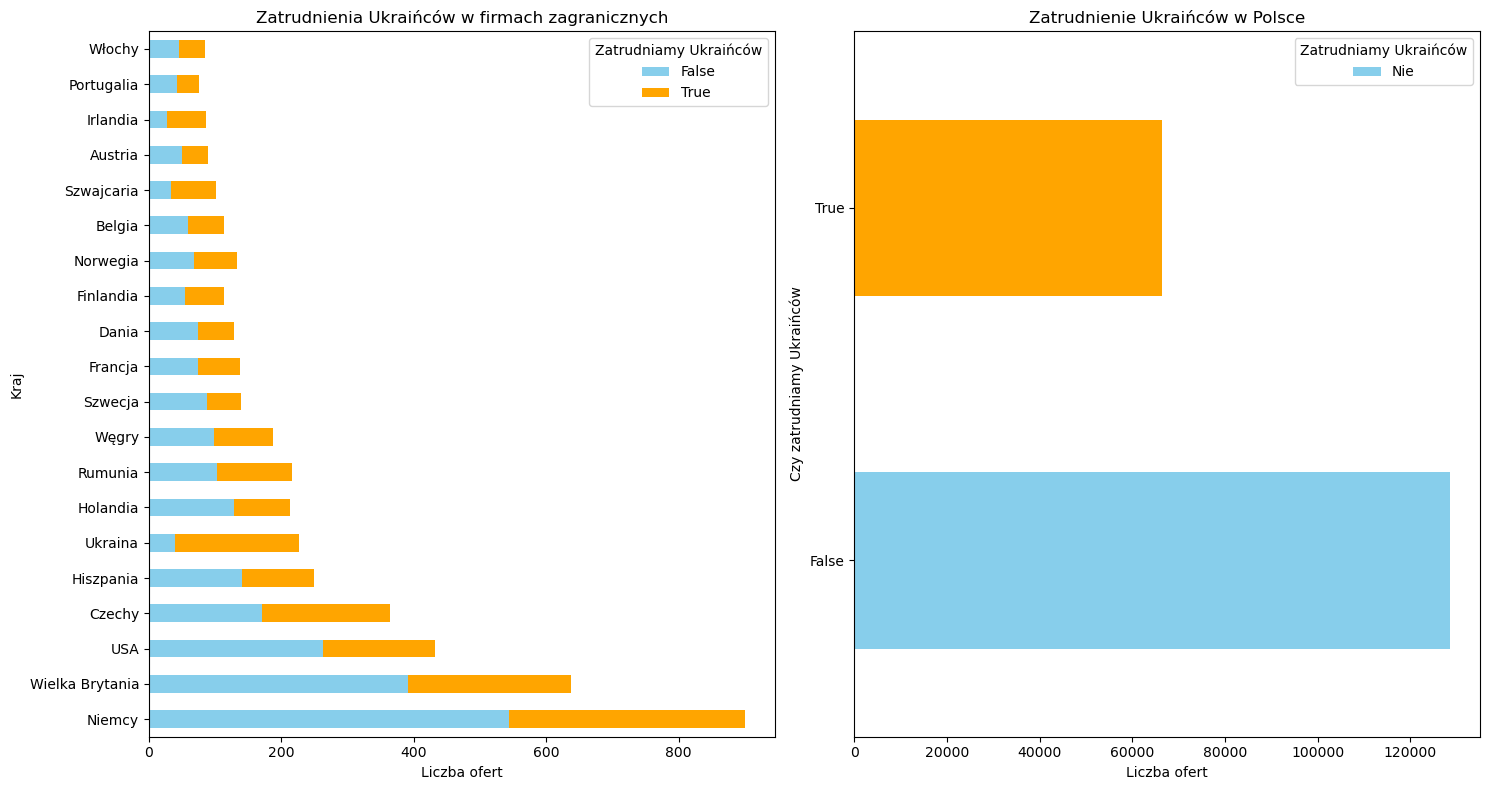

In [199]:
# Zliczanie wartości w kolumnie country_code i pomijanie Polski
country_counts = df_clean['country_code'].value_counts()
country_counts_without_poland = country_counts[country_counts.index != 'Polska']

# Wybieranie krajów z indeksem 1-10
top_countries = country_counts_without_poland.iloc[1:21].index

# Grupa po 'country_code' i 'open_to_hire_ukrainians' oraz zliczanie
country_workplace_counts = df_clean.groupby(['country_code', 'open_to_hire_ukrainians']).size().unstack(fill_value=0)

# Filtrowanie dla wybranych krajów
country_workplace_counts = country_workplace_counts.loc[top_countries]

# Zmiana etykiet krajów na pełne nazwy w tablicy 'popular_countries'
popular_countries = ['Niemcy', 'Wielka Brytania', 'USA', 'Czechy', 
                     'Hiszpania', 'Ukraina', 'Holandia', 'Rumunia', 
                     'Węgry', 'Szwecja', 'Francja','Dania','Finlandia',
                     'Norwegia','Belgia','Szwajcaria','Austria','Irlandia',
                     'Portugalia','Włochy']

# Tworzenie osobnych wykresów
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Wykres dla krajów z indeksem 1-10
country_workplace_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange', 'lightgreen'], ax=axes[0])
axes[0].set_yticklabels(popular_countries)
axes[0].set_xlabel('Liczba ofert')
axes[0].set_ylabel('Kraj')
axes[0].set_title('Zatrudnienia Ukraińców w firmach zagranicznych')
axes[0].legend(title='Zatrudniamy Ukraińców')

# Wykres dla ofert z Polski
poland_workplace_counts = df_clean[df_clean['country_code'] == 'PL'].groupby('open_to_hire_ukrainians').size()

# Narysowanie wykresu
poland_workplace_counts.plot(kind='barh', color=['skyblue', 'orange'], ax=axes[1])

# Ustawienia wykresu
axes[1].set_xlabel('Liczba ofert')
axes[1].set_ylabel('Czy zatrudniamy Ukraińców')
axes[1].set_title('Zatrudnienie Ukraińców w Polsce')

# Dodanie legendy ręcznie
axes[1].legend(title='Zatrudniamy Ukraińców', labels=['Nie', 'Tak'])

plt.tight_layout()
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>Większość firm, zarówno w Polsce, jak i na świecie, nie jest otwarta na zatrudnianie imigrantów z Ukrainy.
<li style='color: violet'>W Europie wyjątek stanowią Szwajcaria i Irlandia.

### <span style='color: lightgreen'>5.9 Wynagrodzenie

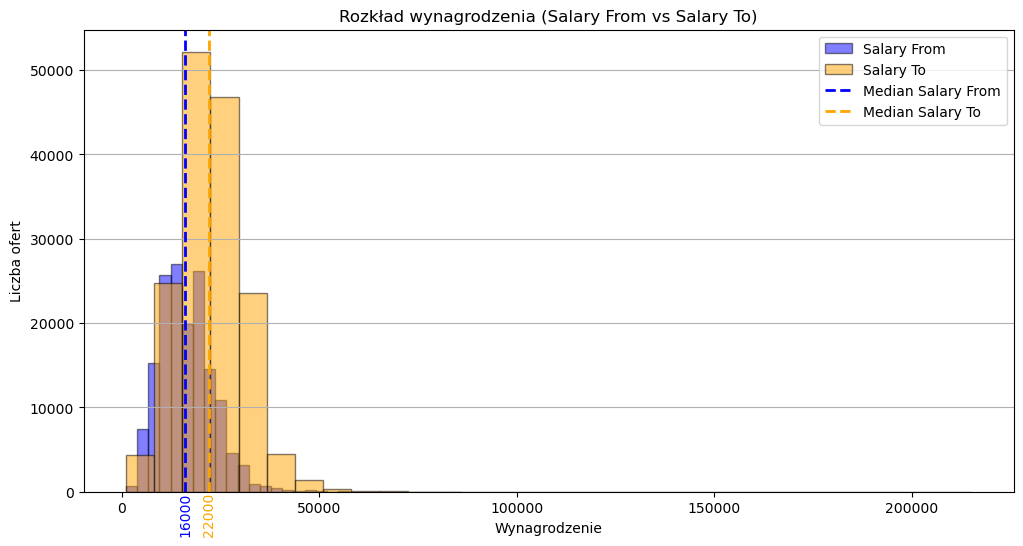

In [200]:
# Ustalanie granic wynagrodzenia
plt.figure(figsize=(12, 6))

# Histogram dla 'salary_from'
plt.hist(df_clean['salary_from'], bins=30, alpha=0.5, label='Salary From', color='blue', edgecolor='black')

# Histogram dla 'salary_to'
plt.hist(df_clean['salary_to'], bins=30, alpha=0.5, label='Salary To', color='orange', edgecolor='black')

# Obliczanie median
median_from = df_clean['salary_from'].median()
median_to = df_clean['salary_to'].median()

# Zaznaczanie median na wykresie
plt.axvline(median_from, color='blue', linestyle='dashed', linewidth=2, label='Median Salary From')
plt.axvline(median_to, color='orange', linestyle='dashed', linewidth=2, label='Median Salary To')

# Dodawanie napisów pionowo
plt.text(median_from, 5, round(median_from), color='blue', rotation=90, ha='center', va='top')
plt.text(median_to, 5, round(median_to), color='orange', rotation=90, ha='center', va='top')

plt.xlabel('Wynagrodzenie')
plt.ylabel('Liczba ofert')
plt.title('Rozkład wynagrodzenia (Salary From vs Salary To)')
plt.legend()
plt.grid(axis='y')
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Mediana miesięcznych widełek płacowych wynosi 16000-22000 zł.

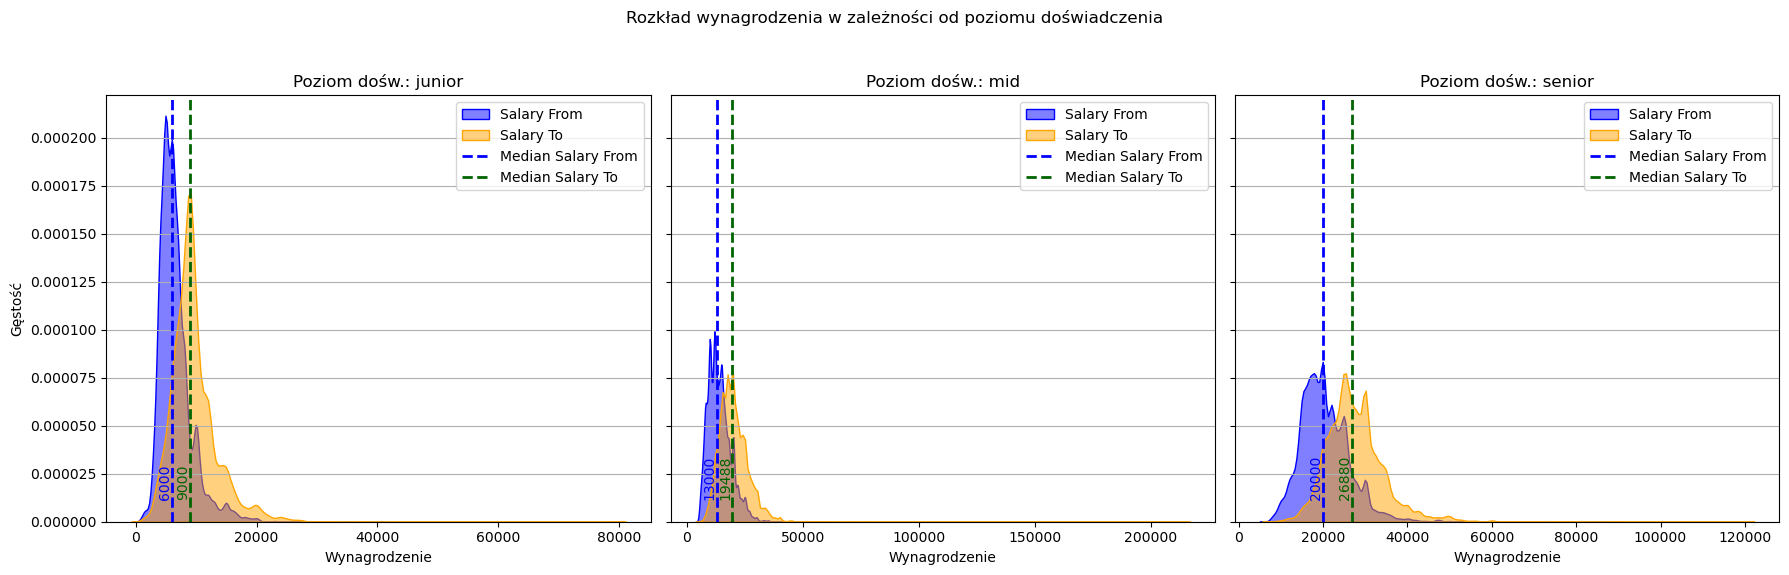

In [201]:
# Ustalanie poziomów doświadczenia i sortowanie
experience_levels = ['junior', 'mid', 'senior']

# Tworzenie subplots
fig, axes = plt.subplots(1, len(experience_levels), figsize=(18, 6), sharey=True)

# Iterowanie przez poziomy doświadczenia i rysowanie krzywych KDE
for ax, level in zip(axes, experience_levels):
    # Filtracja danych dla konkretnego poziomu doświadczenia
    level_data = df_clean[df_clean['experience_level'] == level]

    # Rysowanie krzywej KDE dla 'salary_from'
    sns.kdeplot(level_data['salary_from'], ax=ax, label='Salary From', color='blue', fill=True, alpha=0.5)

    # Rysowanie krzywej KDE dla 'salary_to'
    sns.kdeplot(level_data['salary_to'], ax=ax, label='Salary To', color='orange', fill=True, alpha=0.5)

    # Obliczanie median
    median_from = level_data['salary_from'].median()
    median_to = level_data['salary_to'].median()

    # Zaznaczanie median na wykresie
    ax.axvline(median_from, color='blue', linestyle='dashed', linewidth=2, label='Median Salary From')
    ax.axvline(median_to, color='darkgreen', linestyle='dashed', linewidth=2, label='Median Salary To')

    # Obliczenie maksymalnej gęstości dla każdej osi Y
    max_density = ax.get_ylim()[1]  # Pobieranie maksymalnej wartości osi Y

    # Dodawanie napisów pionowo w oparciu o maksymalną gęstość
    ax.text(median_from, max_density * 0.05, round(median_from), color='blue', rotation=90, ha='right', va='bottom')
    ax.text(median_to, max_density * 0.05, round(median_to), color='darkgreen', rotation=90, ha='right', va='bottom')

    # Ustawienia osi
    ax.set_xlabel('Wynagrodzenie')
    ax.set_title(f'Poziom dośw.: {level}')
    ax.legend()
    ax.grid(axis='y')

# Ustawienia wspólnej osi Y
axes[0].set_ylabel('Gęstość')
plt.suptitle('Rozkład wynagrodzenia w zależności od poziomu doświadczenia')

# Wyświetlanie wykresów
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Dostosowanie układu, aby tytuł nie nachodził na wykresy
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Mediana miesięcznych widełek płacowych dla juniora wynosi 6000-9000 zł, dla mida 13000-19488, a dla seniora 20000-26880 zł.

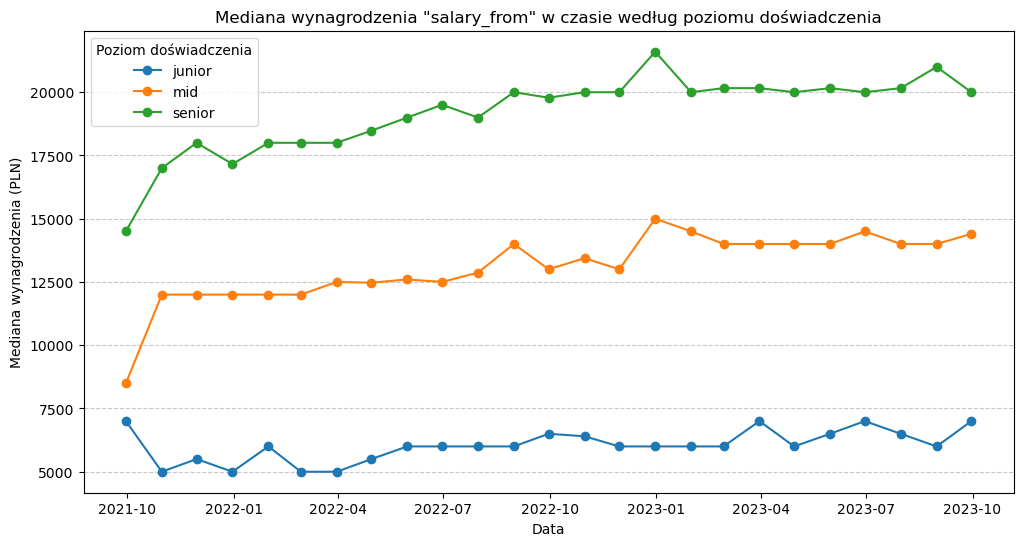

In [202]:
# Tworzymy kopię df_clean, aby uniknąć SettingWithCopyWarning
df_clean = df.drop_duplicates(subset=duplicate_columns).copy()

# Zmiana formatu daty
df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')

# Tworzymy przestrzeń dla wykresu
plt.figure(figsize=(12, 6))

# Obliczamy medianę wynagrodzenia salary_from co miesiąc dla każdego poziomu doświadczenia
for level in experience_levels:
    df_level = df_clean[df_clean['experience_level'] == level].set_index('published_at_first')
    median_salary_1M = df_level['salary_from'].resample('M').median()  # Użyj 'M' dla końca miesiąca
    plt.plot(median_salary_1M.index, median_salary_1M.values, label=level, marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Mediana wynagrodzenia (PLN)')
plt.title('Mediana wynagrodzenia "salary_from" w czasie według poziomu doświadczenia')
plt.legend(title='Poziom doświadczenia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Zdecydowanie najmniejsze zmiany wartości (jest najbardziej płaski) zauważamy dla zarobków juniora, co może wynikać z faktu, że zmiany wynagrodzenia są przeważnie procentowe.
<li style='color: violet'>Dla mida i seniora mediany zarobkowe zachowują podobne trendy.


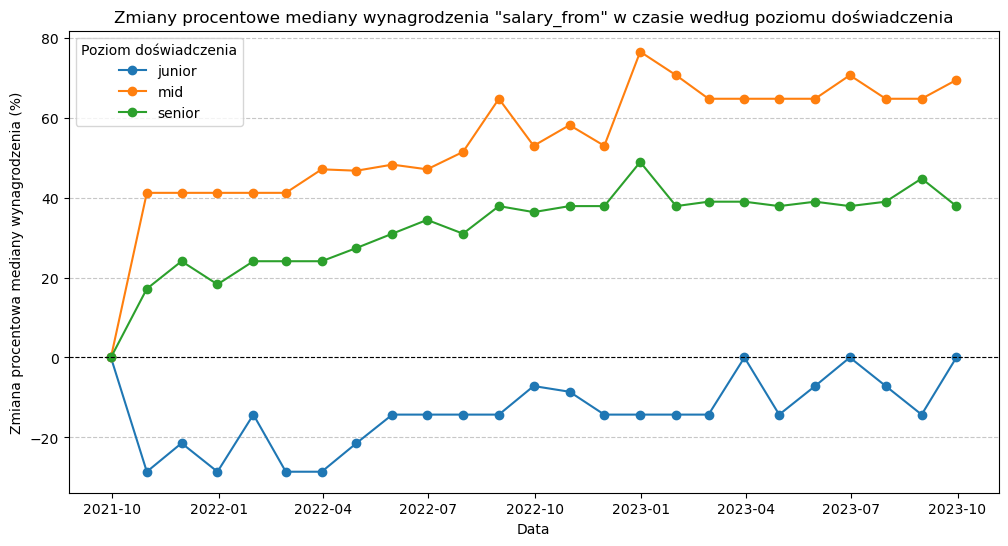

In [203]:
# zmiana formatu daty
df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], format='mixed')
df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], format='mixed')

# Tworzymy przestrzeń dla wykresu
plt.figure(figsize=(12, 6))

# Ustalamy bazową wartość (na październik 2021) dla obliczeń
base_date = '2021-10-01'

# Obliczamy zmiany procentowe mediany wynagrodzenia salary_from co miesiąc dla każdego poziomu doświadczenia
for level in experience_levels:
    df_level = df_clean[df_clean['experience_level'] == level].set_index('published_at_first')

    # Obliczamy medianę i resampling co miesiąc
    median_salary_1M = df_level['salary_from'].resample('1M').median()

    # Ustalamy wartość bazową
    if base_date in median_salary_1M.index:
        base_value = median_salary_1M[base_date]
    else:
        base_value = median_salary_1M.iloc[0]  # Jeśli nie ma dokładnej daty, bierzemy pierwszą medianę

    # Obliczanie procentowej zmiany w odniesieniu do wartości bazowej
    percentage_change = (median_salary_1M - base_value) / base_value * 100

    # Rysowanie zmian procentowych
    plt.plot(percentage_change.index, percentage_change.values, label=level, marker='o', linestyle='-')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Linia na poziomie 0
plt.xlabel('Data')
plt.ylabel('Zmiana procentowa mediany wynagrodzenia (%)')
plt.title('Zmiany procentowe mediany wynagrodzenia "salary_from" w czasie według poziomu doświadczenia')
plt.legend(title='Poziom doświadczenia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Zmiany procentowe są najbardziej zauważalne dla juniora i mida.

### <span style='color: lightgreen'>5.10 Zmiany w czasie

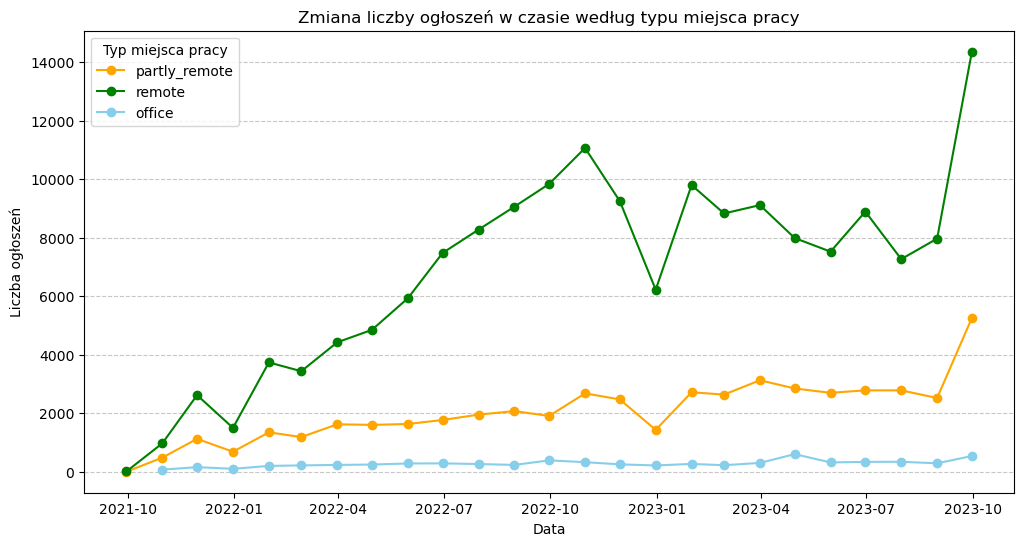

In [204]:
# zmiana formatu daty
df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')

workplace_types = df_clean['workplace_type'].unique()

# Przygotowanie danych do wykresu
plt.figure(figsize=(12, 6))

# Kolory dla różnych typów miejsc pracy
colors = {'office': 'skyblue', 'remote': 'green', 'partly_remote': 'orange'}

# Dla każdego typu miejsca pracy, obliczenie liczby ogłoszeń miesięcznie i narysowanie wykresu
for workplace in workplace_types:
    df_workplace = df_clean[df_clean['workplace_type'] == workplace].set_index('published_at_last')
    monthly_job_counts = df_workplace.resample('M').size()  # Użyj 'M' zamiast '1ME'
    plt.plot(monthly_job_counts.index, monthly_job_counts.values, label=workplace, color=colors.get(workplace, 'blue'), marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Liczba ogłoszeń')
plt.title('Zmiana liczby ogłoszeń w czasie według typu miejsca pracy')
plt.legend(title='Typ miejsca pracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Zdecydowanie w najszybszym tempie rosła liczba ofert w trybie pracy zdalnej.
<li style='color: violet'>Wykres dotyczący ofert pracy stacjonarnej jest niemal płaski - cały czas utrzymuje się na podobnym niskim poziomie.

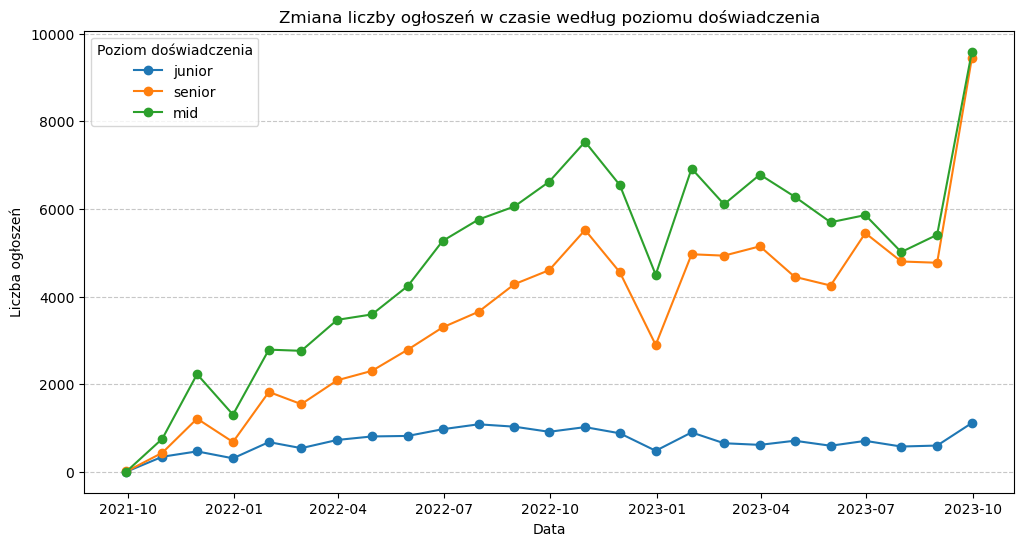

In [205]:
# zmiana formatu daty
df_clean['published_at_first'] = pd.to_datetime(df_clean['published_at_first'], errors='coerce')
df_clean['published_at_last'] = pd.to_datetime(df_clean['published_at_last'], errors='coerce')

experience_levels = df_clean['experience_level'].unique()

# Przygotowanie danych do wykresu
plt.figure(figsize=(12, 6))

# Dla każdego poziomu doświadczenia obliczamy liczbę ogłoszeń miesięcznie i rysujemy wykres
for level in experience_levels:
    df_experience_level = df_clean[df_clean['experience_level'] == level].set_index('published_at_last')
    monthly_job_counts = df_experience_level.resample('M').size()  # Używamy 'M' dla miesiąca 
    plt.plot(monthly_job_counts.index, monthly_job_counts.values, label=level, marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Liczba ogłoszeń')
plt.title('Zmiana liczby ogłoszeń w czasie według poziomu doświadczenia')
plt.legend(title='Poziom doświadczenia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color: violet'> Komentarz:
<li style='color: violet'>Zmiany liczby ofert pracy dla mida i seniora przebiegają podobnie i są zdecydowanie większe niż w przypadku juniora.

## <span style='color: lightgreen'>6. Wartości odstające

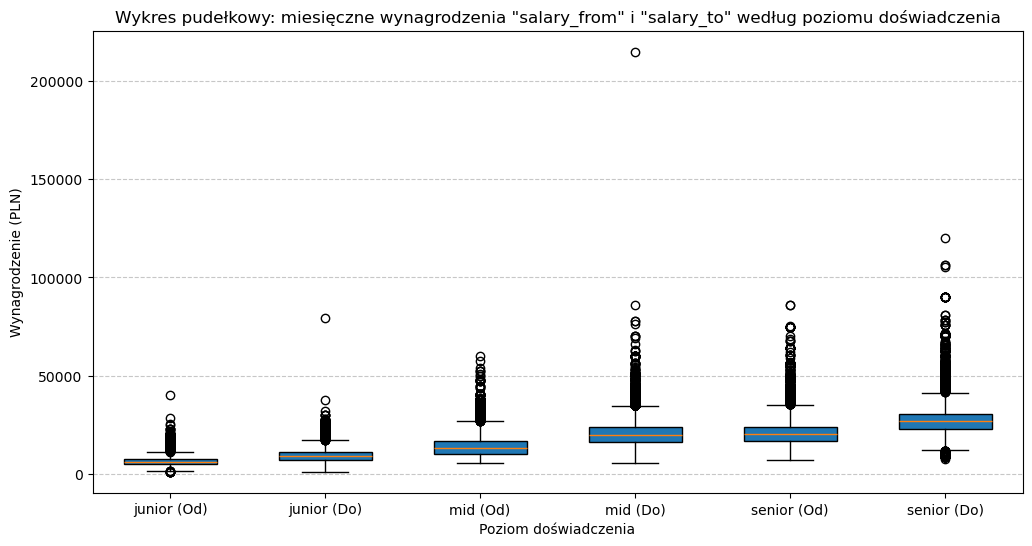

In [206]:
# Upewnijmy się, że dane są poprawne i nie zawierają NaN
salary_data = df_clean[
    (df_clean['salary_from'].notna()) & 
    (df_clean['salary_to'].notna()) & 
    (df_clean['salary_from'] > 0) & 
    (df_clean['salary_to'] > 0)
]

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Ustalanie unikalnych poziomów doświadczenia
experience_levels = ['junior', 'mid', 'senior']

# Przygotowanie danych do wykresu
data_to_plot = []
labels = []

for level in experience_levels:
    from_data = salary_data[salary_data['experience_level'] == level]['salary_from']
    to_data = salary_data[salary_data['experience_level'] == level]['salary_to']

    # Append both 'salary_from' and 'salary_to' data for each level
    data_to_plot.append(from_data)
    data_to_plot.append(to_data)

    # Append corresponding labels
    labels.append(f'{level} (Od)')
    labels.append(f'{level} (Do)')

# Ustalanie pozycji wykresu
positions = [i for i in range(len(data_to_plot))]

# Rysowanie wykresu pudełkowego
plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# Ustalanie etykiet osi X
plt.xticks(positions, labels)

# Estetyka wykresu
plt.title('Wykres pudełkowy: miesięczne wynagrodzenia "salary_from" i "salary_to" według poziomu doświadczenia')
plt.xlabel('Poziom doświadczenia')
plt.ylabel('Wynagrodzenie (PLN)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

<span style='color: violet'> Komentarze:
<li style='color: violet'>W widełkach wynagrodzenia występuje bardzo dużo wartości odstających, niezależnie od poziomu doświadczenia.
<li style='color: violet'>Najbardziej przyciąga wzrok outlier dla górnej granicy płacy poziomu mid - niemal na pewno jest to błąd ogłoszeniodawcy, ponieważ kwota dolnej granicy widełek jest aż 10-krotnie mniejsza.
<li style='color: violet'>Wartości mniejsze od założonego minimum dla juniorów to staże i praktyki, a wartości większe od maksimum dla seniorów to głównie stanowiska kierownicze.
<li style='color: violet'>Należy pamiętać, że założone mediany, minima i maksima mogą być obarczone błędem, ponieważ część wypłat została przekształcona do miesięcznej z dniowej, tygodniowej czy rocznej według ustalonych granic, które również mogą zawierać błędy.

## <span style='color: lightgreen'>6. Wnioski i komentarze

<span style='color: violet'> Powyższa analiza obejmowała dane dotyczące ofert pracy ze strony JustJoinIT z okresu 2 lat, czyli od września 2021 r. do września 2023 r.
Jak prezentują się oferty sprzed kilku lat na tle tych aktualnych? Na to pytanie postaram się odpowiedzieć porównując ogłoszenia w odniesieniu do dwóch kryteriów: sposobu prezentacji ofert oraz wartości w nich zawartych.

<li style='color: violet; font-size: 20px; margin-bottom: 12px;'>Prezentacja danych <br></li>
<span style='color: violet;'>Zdecydowanie największy problem danych sprzed lat to brak wymiaru czasu, którego dotyczy wynagrodzenie. Zmusza to do przyjęcia pewnych limitów płac dziennych, tygodniowych, miesięcznych i rocznych, co może prowadzić do błędów. W ofertach aktualnych problem ten jest rozwiązany poprzez dodatkową kolumnę z podanym wymiarem czasowym. Druga niedogodność dotyczy ofert firm zagranicznych, które ofertują pracę hybrydową, nie podając przy tym informacji o możliwości zakwaterowania oraz o wymiarze czasu pracy. W obecnych ofertach firmy informują, czy szukają pracownika na pełny etat lub część oraz podają kilka lokalizacji, więc łatwiej potencjalnemu kandydatowi wybrać tę najbardziej dogodną.</span>

<li style='color: violet; font-size: 20px; margin-bottom: 12px;'>Praca dziś a kiedyś <br></li>
<span style='color: violet;'>Jak kilka lat temu, tak i teraz, najczęściej poszukiwani są seniorzy, dominujący typ zatrudnienia to b2b, a listę miast z największą liczbą ofert otwierają: Warszawa, Kraków, Wrocław, Gdańsk i Poznań. W latach 2021-2023 dominował typ pracy zdalnej, a obecnie najczęściej występuje hybryda. W zarobkach wzrost można zauważyć głównie dla juniorów. W przypadku najczęściej wymaganych umiejętności języki programowania Java i JavaScript ustąpiły miejsca Pythonowi i Sql, a znajomość języka angielskiego jest niezmiennie jednym z priorytetów dla pracodawców.</span>

In [207]:
!jupyter nbconvert eda_old_data_justjoinit.ipynb --to html --no-input --no-prompt --output eda_old_data_justjoinit.html

[NbConvertApp] Converting notebook eda_old_data_justjoinit.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1536067 bytes to eda_old_data_justjoinit.html
